# Welcome to WOA7015 Advance Machine Learning Lab - Week 5
This code is generated for the purpose of WOA7015 module.



## Now we do a simple SVM model training. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

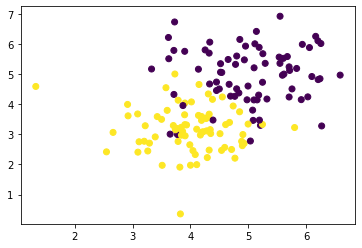

In [ ]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [ ]:
# Create the SVM with linear kernel
# svm = SVC(random_state=42, kernel='poly', C=1, degree=2)
svm = SVC(random_state=42, kernel='linear')
# Fit the data to the SVM classifier
svm = svm.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


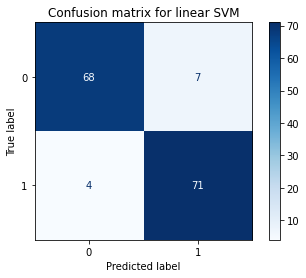

In [ ]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X, y,
                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9267


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


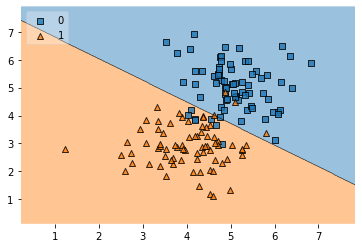

In [ ]:

# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

### How do we know if the model is good to predict future data? 
We split the data into training and testing data. 

Testing data serves as a future data. 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/train_test.png" width="300"/>

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [ ]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9333
Model testing accuracy: 0.9000


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


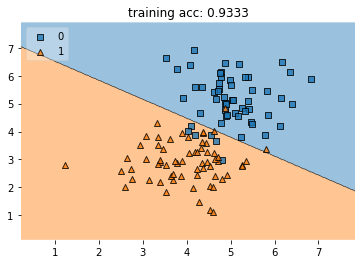

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


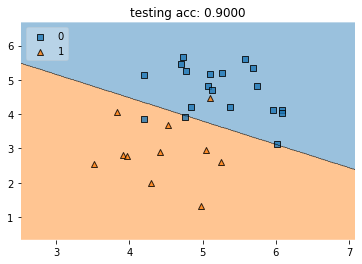

In [ ]:
# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

# To check if the model is really robust. 
# We can do cross validation.

Cross validation is we seperate data into k-fold. Here, we demostrate 5-fold. <br> 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_2*. <br>

**At third iteration**, 
*   Use the first 1, 2, 4, 5 set of data for training (blue boxes) and 3rd set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_3*. <br>

**Repeat till 5th iteration, we will have 5 validation accuracy. <br>
Average accuracy can be computed to evaluate the model performance.**









In [ ]:
from sklearn.model_selection import KFold
# refer to  https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')


Fold  1
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.9333
------------------------------------
Fold  2
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9083
Model testing accuracy: 1.0000
------------------------------------
Fold  3
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9250
Model testing accuracy: 0.9333
------------------------------------
Fold  4
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9333
Model testing accuracy: 0.9000
------------------------------------
Fold  5
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9417
Model testing accuracy: 0.8667
------------------------------------
Validation Accuracy: 0.9250 +- 0.0442


## Hyperparameter Tuning

We know that there are parameters that can be tuned. For example, choose the kernel - linear / polynomial / rbf, C - regularizer. To determine the best hyperparameter, we use grid_search which uses cross validation concept to determine the best hyperparameter. 


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**Split the data into Train, Validation and Test**

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    The model that give the highest validation accuracy will be chosen. 
*    We will get *validation accuracy_1* and a set of *hyperparameter_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    We will get *validation accuracy_2* and a set of *hyperparameter_2*. <br>


**Repeat till 5th iteration, we will have 5 validation accuracies. <br>
The set of hyperparameters that gives the highest validation accuracy will be chosen.  <br>
Retrain your model with all of the training + validation data using the best hyperparameter. <br>
Evaluate your final model on test set** 


### We can use GridSearchCV in which it does the procedure we described. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

In this example, we use iris data. 
X has four variables. 
1. sepal length in cm 
2. sepal width in cm
3. petal length in cm
4. petal width in cm

y has three outputs. 
*  0 -- Iris Setosa
*  1 -- Iris Versicolour
*  2 -- Iris Virginica





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [ ]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=7)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000648,0.000179,0.000303,0.000074,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,0.823529,0.941176,1.0,0.941176,0.957983,0.060598,1
1,0.000857,0.000015,0.000331,0.000016,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.833333,0.823529,0.941176,0.882353,0.941176,1.0,0.764706,0.883754,0.076018,6
2,0.000498,0.000009,0.000253,0.000009,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.941176,1.000000,0.823529,1.000000,1.0,0.941176,0.957983,0.060598,1
3,0.000678,0.000106,0.000296,0.000019,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,0.764706,1.000000,1.0,0.941176,0.957983,0.081474,1
4,0.000639,0.000144,0.000283,0.000042,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,0.941176,1.000000,0.764706,0.941176,1.0,1.000000,0.949580,0.079721,4
5,0.000638,0.000021,0.000290,0.000012,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.944444,0.941176,1.000000,0.764706,1.000000,1.0,0.941176,0.941643,0.077027,5


In [ ]:
# Retrain the model with the best hyperparameter 
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 0.1, 'kernel': 'linear'}


SVC(C=0.1, kernel='linear')

In [ ]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])  
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

Model CV accuracy:  0.957983193277311
Model testing accuracy:  1.0
Parameter used: {'C': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


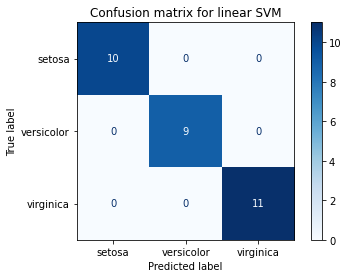

In [ ]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svc, X_test, y_test,
                              cmap=plt.cm.Blues, 
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Your task (10%): Train a SVM model to best classify breast cancer data.

Steps:
1. Load data 
2. 2% - split data into 80% train, 20% test 
3. 2% - train your svm model using only the train data. 
4. 4% - Try at least 10 different hyperparameter using cross validation, obtain the validation accuracies. 
5. 2% - What do you observe? 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

In [ ]:
# 1.Load the breast cancer dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
data = load_breast_cancer()
X = data.data
y = data.target
print(len(X))
print(X)
print('-----')
print(y)

569
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
-----
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 

In [ ]:
# 2.split data into 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  455
no of testing data:  114


In [ ]:
# 3.train your svm model using only the train data.

# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9750
Model testing accuracy: 1.0000


In [ ]:
# Cross validation
from sklearn.model_selection import KFold
# refer to  https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')

Fold  1
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9758
Model testing accuracy: 0.9298
------------------------------------
Fold  2
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9582
Model testing accuracy: 0.9561
------------------------------------
Fold  3
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9670
Model testing accuracy: 0.9649
------------------------------------
Fold  4
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9692
Model testing accuracy: 0.9649
------------------------------------
Fold  5
no of training data:  456
no of validation data:  113
Model training accuracy: 0.9649
Model testing accuracy: 0.9469
------------------------------------
Validation Accuracy: 0.9670 +- 0.0132


In [ ]:
# 4.Try at least 10 different hyperparameter using cross validation, obtain the validation accuracies.

# split data into 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

svc = SVC()
parameters =  { 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf','linear','sigmoid']  }
clf = GridSearchCV(svc, parameters, cv=7)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

no of training data:  455
no of testing data:  114


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014589,0.000633,0.002801,0.000095,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.630769,0.630769,0.630769,0.630769,0.630769,0.630769,0.615385,0.628571,0.005383,38
1,0.142206,0.048366,0.000599,0.000016,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.969231,0.969231,0.923077,0.984615,0.953846,0.938462,0.907692,0.949451,0.025631,21
2,0.004268,0.000149,0.000868,0.000017,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.630769,0.630769,0.630769,0.630769,0.630769,0.630769,0.615385,0.628571,0.005383,38
3,0.014511,0.000238,0.002781,0.000053,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.630769,0.630769,0.630769,0.630769,0.630769,0.630769,0.615385,0.628571,0.005383,38
4,0.141706,0.048873,0.000610,0.000028,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.969231,0.969231,0.923077,0.984615,0.953846,0.938462,0.907692,0.949451,0.025631,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,7.763988,4.072715,0.000581,0.000015,1000,0.001,linear,"{'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}",0.969231,0.953846,0.953846,1.000000,0.969231,0.969231,0.938462,0.964835,0.017855,1
71,0.004314,0.000077,0.000951,0.000062,1000,0.001,sigmoid,"{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.630769,0.630769,0.630769,0.630769,0.630769,0.630769,0.615385,0.628571,0.005383,38
72,0.006488,0.000739,0.001057,0.000258,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.953846,0.984615,0.876923,0.923077,0.923077,0.923077,0.907692,0.927473,0.031544,29
73,7.768474,4.104228,0.000568,0.000016,1000,0.0001,linear,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}",0.969231,0.953846,0.953846,1.000000,0.969231,0.969231,0.938462,0.964835,0.017855,1


In [ ]:
# 5. What do you observe?

# Retrain the model with the best hyperparameter 
best_param = clf.best_params_
best_score = clf.best_score_
print('Best Parameters: ', best_param)
print('Best Score:', best_score)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

Best Parameters:  {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.9648351648351648


SVC(C=1000, gamma=1, kernel='linear')

In [ ]:
# Evaluate model performance using test data

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')
print('Model CV accuracy: ', best_score)  
print('Parameter used:', best_param)

Model training accuracy: 0.9560
Model testing accuracy: 0.9825
Model CV accuracy:  0.9648351648351648
Parameter used: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


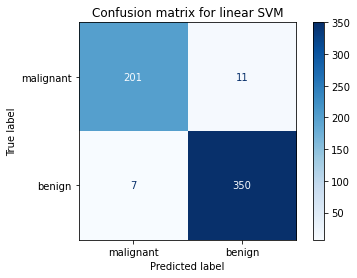

In [ ]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svc, X, y,
                              cmap=plt.cm.Blues, 
                               display_labels=data.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

There 74 different combination of hyperparameters tested. The hyperparameters' values are as shown below.  
```
{  'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf','linear','sigmoid']  }
```
Based the results, the best option for the hyperparameters are `{'C': 1000, 'gamma': 1, 'kernel': 'linear'}`. <br>
The mean test score is `0.9648351648351648`. <br>
The accuracy for the training data is `0.9560` while the testing data accuracy is `0.9825`. <br>
From the confusion matrix, it can be seen that there is `11` false negative and `7` false positive predicted by the trained mode. The positive here indicates the malignant cancer cell. 

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Upload the PDF to Spectrum. 